In [2]:
from repepo.experiments_2.extract_concept_vectors import ConceptVectorsConfig
from repepo.experiments_2.evaluate_concept_vectors import (
    get_experiment_path,
    load_concept_vectors_and_mean_relative_norms
)

config = ConceptVectorsConfig()
concept_vectors, mean_relative_norms = load_concept_vectors_and_mean_relative_norms(config)

print(len(concept_vectors))

40


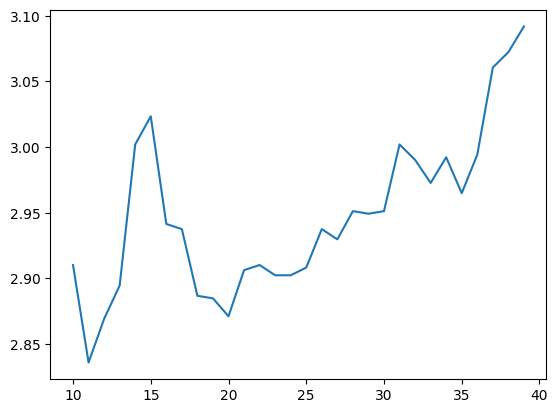

In [4]:
# Plot the mean relative norms
import matplotlib.pyplot as plt
import numpy as np

plt.plot(list(mean_relative_norms.values()))